# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [ ]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [ ]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



11490434/11490434 [==============================] - 1s 0us/step


## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [ ]:
# Preprocess the data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)) / 255.0

# Turn labels into categories using to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)





In [ ]:
# Print the results
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test  shape:", y_test.shape)

X_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
y_test  shape: (10000, 10)


## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [ ]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])






**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train , epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 69s 36ms/step - loss: 0.1899 - accuracy: 0.9405 - val_loss: 0.0754 - val_accuracy: 0.9776
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0667 - accuracy: 0.9794 - val_loss: 0.0511 - val_accuracy: 0.9850
Epoch 3/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0455 - accuracy: 0.9858 - val_loss: 0.0444 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0350 - accuracy: 0.9887 - val_loss: 0.0438 - val_accuracy: 0.9870
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0484 - val_accuracy: 0.9875
Epoch 6/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0589 - val_accuracy: 0.9851
Epoch 7/10
1875/1875 [==============================] - 63s 34ms/step - loss: 0.0189 - accuracy: 0.9939 - val_loss: 0.0474 -

In [ ]:
print(history.history)

{'loss': [0.18988102674484253, 0.06666277348995209, 0.04546251893043518, 0.03504759818315506, 0.027840228751301765, 0.022409632802009583, 0.018948014825582504, 0.0158400721848011, 0.012800723314285278, 0.012001181952655315], 'accuracy': [0.9404500126838684, 0.979449987411499, 0.98580002784729, 0.9887333512306213, 0.9912166595458984, 0.9926666617393494, 0.9939333200454712, 0.9948999881744385, 0.9955666661262512, 0.9962000250816345], 'val_loss': [0.07539709657430649, 0.051065344363451004, 0.04442939907312393, 0.0437910296022892, 0.04835875704884529, 0.05890456587076187, 0.04742003232240677, 0.05349259078502655, 0.06319573521614075, 0.05395875126123428], 'val_accuracy': [0.9775999784469604, 0.9850000143051147, 0.986299991607666, 0.9869999885559082, 0.987500011920929, 0.9850999712944031, 0.9858999848365784, 0.986299991607666, 0.9839000105857849, 0.9876000285148621]}


## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 3s 9ms/step - loss: 0.0540 - accuracy: 0.9876
Test Accuracy: 0.9876000285148621


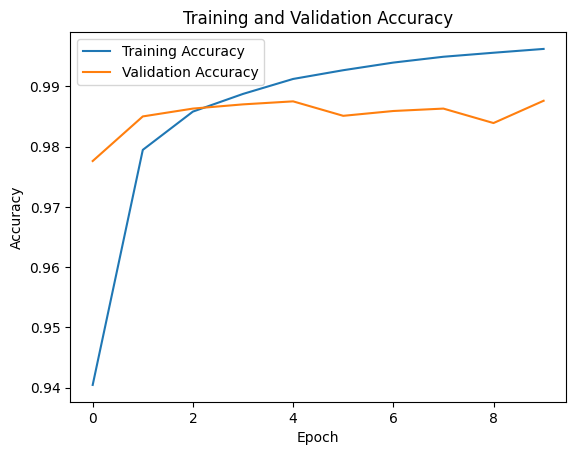

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()




313/313 [==============================] - 4s 12ms/step - loss: 0.0540 - accuracy: 0.9876
Test Loss: 0.05395875126123428


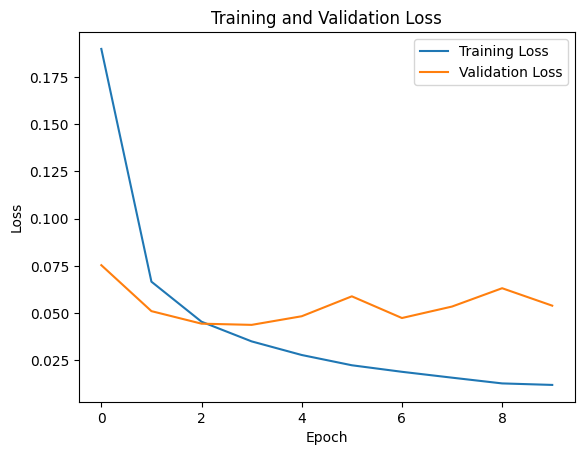

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()